In [84]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

#### Se requiere de un modelo que proponga un valor de cantidad de unidades de compra para cada producto. Deberás tener en cuenta que es tan importante poder encontrar el modelo como también explicar cómo lograste obtenerlo.

In [85]:
compra = pd.read_csv('Datasets/Compra_Procesado.csv',sep = ',', parse_dates=['Fecha'])
from IPython.display import clear_output

In [86]:
compra.head()

,IdCompra,Fecha,IdProducto,Cantidad,Precio,IdProveedor,MinPrecio,MaxPrecio,MinCantidad,MaxCantidad,Calidad_Precio,Calidad_Cantidad,Compra,Fecha_Año,Fecha_Mes,Fecha_Periodo
0,1,2015-01-30,42832,13,560.51,12,423.27500,697.74500,0.0,20.125,Sin errores,Sin errores,7286.63,2015,1,201501
1,2,2015-01-30,42833,11,497.58,7,474.70625,730.16375,0.0,18.500,Sin errores,Sin errores,5473.38,2015,1,201501
2,3,2015-01-30,42834,1,588.50,6,463.36250,690.35750,0.0,18.500,Sin errores,Sin errores,588.50,2015,1,201501
3,4,2015-01-30,42835,9,567.66,14,509.01875,653.13125,0.0,18.000,Sin errores,Sin errores,5108.94,2015,1,201501
4,5,2015-01-30,42839,14,231.31,2,195.90500,310.08500,0.0,22.000,Sin errores,Sin errores,3238.34,2015,1,201501


In [87]:
compra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11539 entries, 0 to 11538
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   IdCompra          11539 non-null  int64         
 1   Fecha             11539 non-null  datetime64[ns]
 2   IdProducto        11539 non-null  int64         
 3   Cantidad          11539 non-null  int64         
 4   Precio            11172 non-null  float64       
 5   IdProveedor       11539 non-null  int64         
 6   MinPrecio         11539 non-null  float64       
 7   MaxPrecio         11539 non-null  float64       
 8   MinCantidad       11539 non-null  float64       
 9   MaxCantidad       11539 non-null  float64       
 10  Calidad_Precio    11539 non-null  object        
 11  Calidad_Cantidad  11539 non-null  object        
 12  Compra            11172 non-null  float64       
 13  Fecha_Año         11539 non-null  int64         
 14  Fecha_Mes         1153

#### Nos quedamos con los registros en los que no encontramos outliers o faltantes

In [88]:
print('shape de compra con errores:',compra.shape)

compra = compra[(compra.Calidad_Precio == 'Sin errores') & (compra.Calidad_Cantidad == 'Sin errores')]

print('Shape de compras sin errores:', compra.shape)

shape de compra con errores: (11539, 16)
Shape de compras sin errores: (10001, 16)


In [89]:
compra.head()

,IdCompra,Fecha,IdProducto,Cantidad,Precio,IdProveedor,MinPrecio,MaxPrecio,MinCantidad,MaxCantidad,Calidad_Precio,Calidad_Cantidad,Compra,Fecha_Año,Fecha_Mes,Fecha_Periodo
0,1,2015-01-30,42832,13,560.51,12,423.27500,697.74500,0.0,20.125,Sin errores,Sin errores,7286.63,2015,1,201501
1,2,2015-01-30,42833,11,497.58,7,474.70625,730.16375,0.0,18.500,Sin errores,Sin errores,5473.38,2015,1,201501
2,3,2015-01-30,42834,1,588.50,6,463.36250,690.35750,0.0,18.500,Sin errores,Sin errores,588.50,2015,1,201501
3,4,2015-01-30,42835,9,567.66,14,509.01875,653.13125,0.0,18.000,Sin errores,Sin errores,5108.94,2015,1,201501
4,5,2015-01-30,42839,14,231.31,2,195.90500,310.08500,0.0,22.000,Sin errores,Sin errores,3238.34,2015,1,201501


#### Nos quedamos con las columnas que vamos a usar

In [90]:
compra = compra[['Fecha', 'IdProducto', 'Cantidad', 'Fecha_Año', 'Fecha_Mes', 'Fecha_Periodo']]

In [91]:
compra.sort_values(['IdProducto', 'Fecha'], inplace = True)

In [92]:
compra.reset_index(inplace = True, drop = True)
compra.head()

,Fecha,IdProducto,Cantidad,Fecha_Año,Fecha_Mes,Fecha_Periodo
0,2015-05-29,42737,8,2015,5,201505
1,2015-06-26,42737,9,2015,6,201506
2,2015-07-31,42737,5,2015,7,201507
3,2015-08-28,42737,10,2015,8,201508
4,2015-10-30,42737,3,2015,10,201510


#### Visualizamos el comportamiento de los datos de un único producto aleatorio

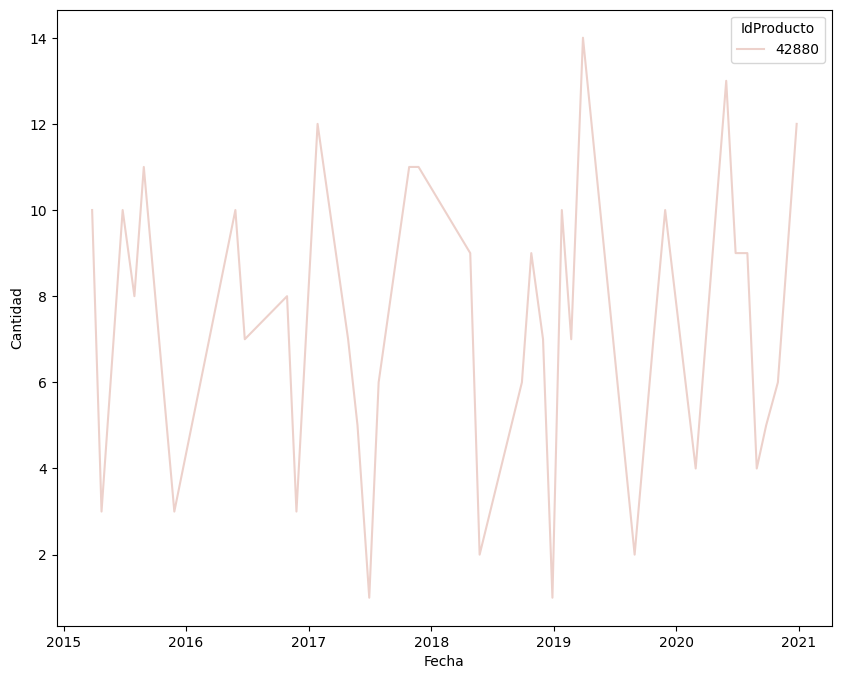

In [93]:
plt.figure(figsize = (10,8))
sns.lineplot(x = 'Fecha', y = 'Cantidad', data = compra[compra.IdProducto == 42880], hue = 'IdProducto')
plt.show()

#### Convertimos el campo Fecha a numerico para usarlo como input en el modelo

In [94]:
import datetime as dt
compra['Fecha_Numerico'] = compra['Fecha'].map(dt.datetime.toordinal)
compra.head()

,Fecha,IdProducto,Cantidad,Fecha_Año,Fecha_Mes,Fecha_Periodo,Fecha_Numerico
0,2015-05-29,42737,8,2015,5,201505,735747
1,2015-06-26,42737,9,2015,6,201506,735775
2,2015-07-31,42737,5,2015,7,201507,735810
3,2015-08-28,42737,10,2015,8,201508,735838
4,2015-10-30,42737,3,2015,10,201510,735901


In [111]:
x = compra[(compra.IdProducto == 42880) & (compra.Fecha_Año == 2020)].Fecha_Numerico
y = compra[(compra.IdProducto == 42880) & (compra.Fecha_Año == 2020)].Cantidad

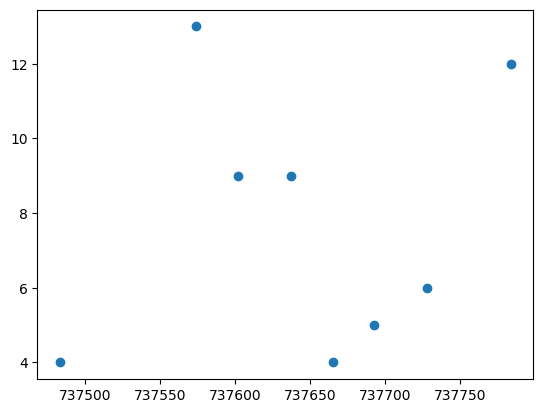

In [112]:
plt.scatter(x, y)
plt.show()

In [113]:
compra[(compra.IdProducto == 42880)][['Fecha_Numerico','Cantidad']].corr()

,Fecha_Numerico,Cantidad
Fecha_Numerico,1.000000,0.021713
Cantidad,0.021713,1.000000


In [114]:
compra[(compra.IdProducto == 42880) & (compra.Fecha_Año >= 2020)][['Fecha_Numerico','Cantidad']].corr()

,Fecha_Numerico,Cantidad
Fecha_Numerico,1.000000,0.175662
Cantidad,0.175662,1.000000


#### Importamos el modelo

In [115]:
from sklearn.linear_model import LinearRegression

#### Separamos los datos en Train Y Test

In [116]:
X_train = compra[(compra.IdProducto == 42880) & (compra.Fecha_Periodo >= 201901) & (compra.Fecha_Periodo < 202008)].Fecha_Numerico.values
y_train = compra[(compra.IdProducto == 42880) & (compra.Fecha_Periodo >= 201901) & (compra.Fecha_Periodo < 202008)].Cantidad.values
X_test = compra[(compra.IdProducto == 42880) & (compra.Fecha_Periodo >= 202008)].Fecha_Numerico.values
y_test = compra[(compra.IdProducto == 42880) & (compra.Fecha_Periodo >= 202008)].Cantidad.values

In [117]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [118]:
modelo = LinearRegression(fit_intercept=True)

In [119]:
modelo.fit(X_train, y_train)

LinearRegression()

In [120]:
modelo.coef_

array([-0.0002833])

In [121]:
from sklearn.metrics import mean_squared_error
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred))

Error en datos de train: 12.246926216399482
Error en datos de test: 12.489120950436343


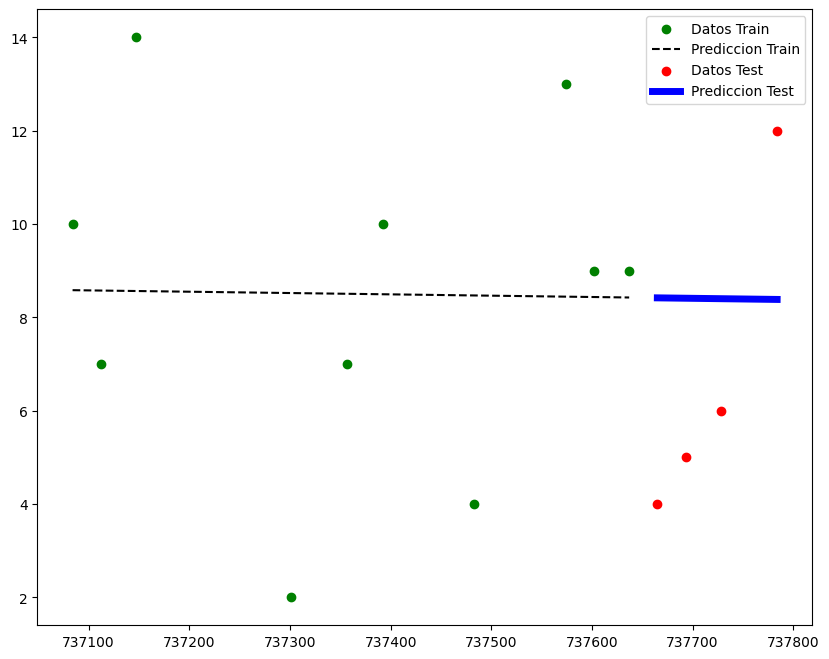

In [122]:
plt.figure(figsize = (10,8))

plt.scatter(X_train, y_train,  color='green', label = 'Datos Train')
plt.plot(X_train, y_train_pred, color='k', linestyle = '--', label = 'Prediccion Train')

plt.scatter(X_test, y_test,  color='red', label = 'Datos Test')
plt.plot(X_test, y_test_pred, color='blue', linewidth=5.0, label = 'Prediccion Test')

plt.legend()
plt.show()

In [123]:
from datetime import datetime
fecha_prediccion = '2021-01-01'

In [124]:
fecha_prediccion = datetime.strptime(fecha_prediccion, '%Y-%m-%d').date()

In [125]:
fecha_prediccion = fecha_prediccion.toordinal()

In [126]:
fecha_prediccion = np.array(fecha_prediccion)

In [127]:
fecha_prediccion = fecha_prediccion.reshape(-1,1)

In [128]:
cantidad_prediccion = modelo.predict(fecha_prediccion)

In [129]:
print('La cantidad que se predice es :' + str(round(cantidad_prediccion[0],2)))

La cantidad que se predice es :8.38
